In [1]:
import cftime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
def convert_cftime_to_datetime(time_values):
    """Convert cftime objects to numpy datetime64"""
    if isinstance(time_values[0], cftime.datetime):
        return np.array([np.datetime64(t.strftime('%Y-%m-%d %H:%M:%S')) for t in time_values])
    return time_values

In [3]:
control_in = xr.open_dataset("/home/modex_user/inputdata/cru-ts40_ar5_rcp85_ncar-ccsm4_toolik_field_station_10x10/transient-scenario-climate.nc")
treat_in = xr.open_dataset("/home/modex_user/inputdata/cru-ts40_ar5_rcp85_ncar-ccsm4_toolik_field_station_10x10_warming_2.6C_JJAS_2019/transient-scenario-climate.nc")

In [4]:
# Get some cleaner non-cftime objects that play nicer with the plotting
time = convert_cftime_to_datetime(control_in.time.values)

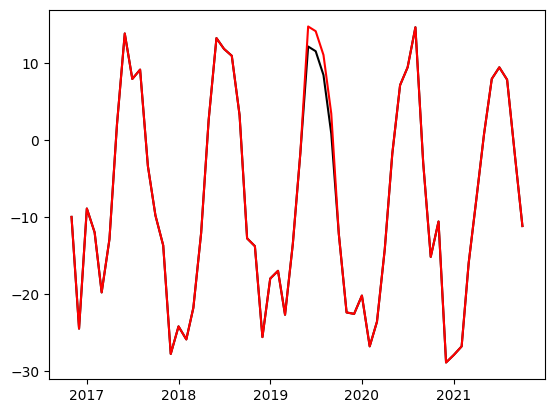

In [5]:
plt.plot(time[1390:1450], control_in.tair[1390:1450,0,0], color='black')
plt.plot(time[1390:1450], treat_in.tair[1390:1450,0,0], color='red')

In [6]:

control_GPP = xr.open_dataset('/home/modex_user/output/tem/tem_ee3_warming/control/output/GPP_monthly_tr.nc')
treat_GPP = xr.open_dataset('/home/modex_user/output/tem/tem_ee3_warming/treatment/output/GPP_monthly_tr.nc')

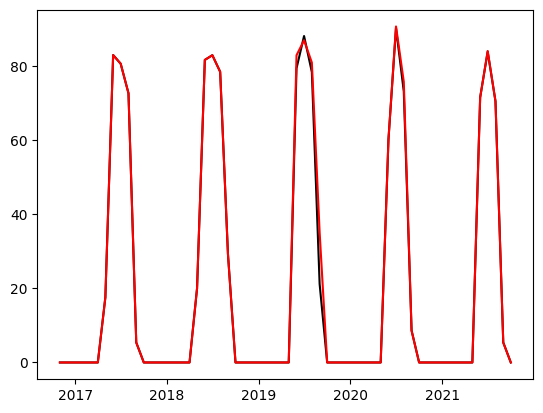

In [7]:
plt.plot(time[1390:1450],control_GPP.GPP.sum('pft')[1390:1450,0,0], color='black')
plt.plot(time[1390:1450],treat_GPP.GPP.sum('pft')[1390:1450,0,0], color='red')


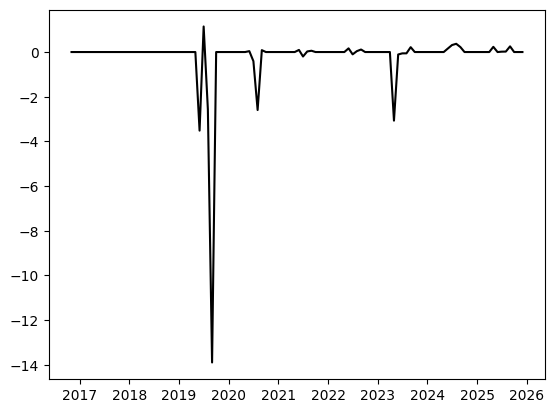

In [11]:
plt.plot(time[1390:1500],  (control_GPP.GPP.sum('pft')[1390:1500,0,0] - treat_GPP.GPP.sum('pft')[1390:1500,0,0]) , color='black')